# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* displot
* jointplot
* pairplot
* rugplot
* kdeplot

## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# !pip install seaborn

## Data
### Seaborn comes with built-in datasets!
### Built-in datasets(https://github.com/mwaskom/seaborn-data)

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## displot

The distplot shows the distribution of a univariate set of observations.

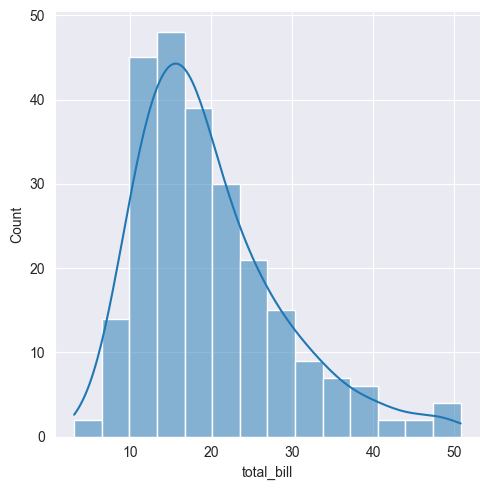

In [5]:
sns.displot(tips['total_bill'], kde=True)

To remove the kde layer and just have the histogram use:

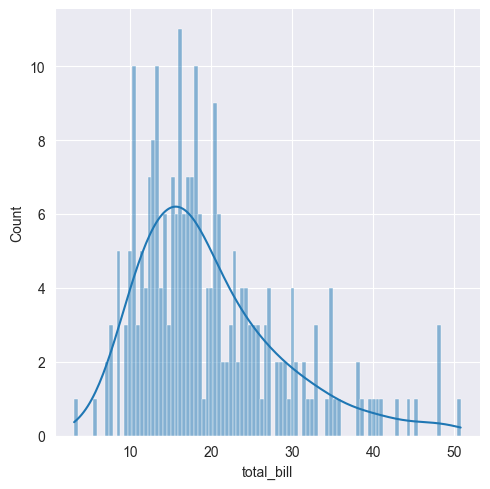

In [6]:
sns.displot(tips['total_bill'], kde=True, bins=100)

## jointplot(https://seaborn.pydata.org/generated/seaborn.jointplot.html)

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 

* kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }

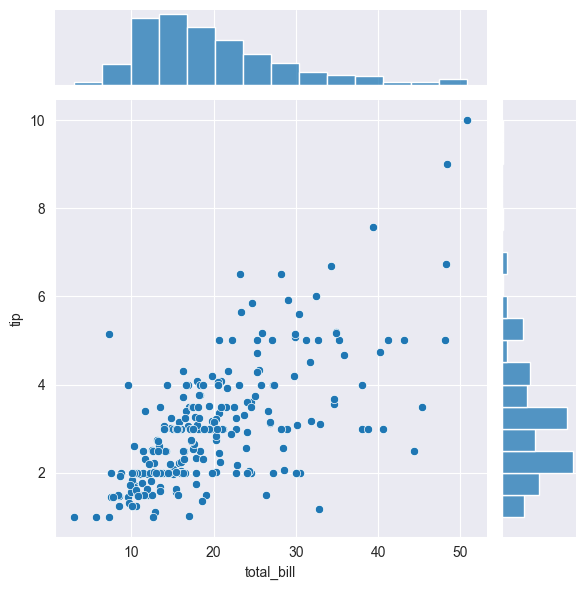

In [7]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

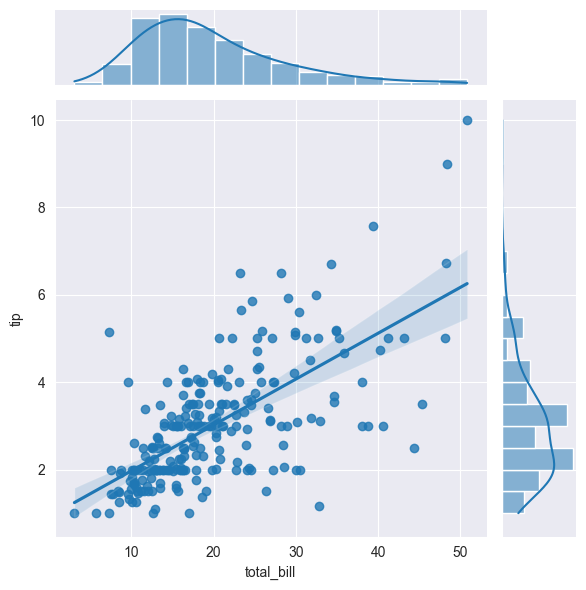

In [8]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

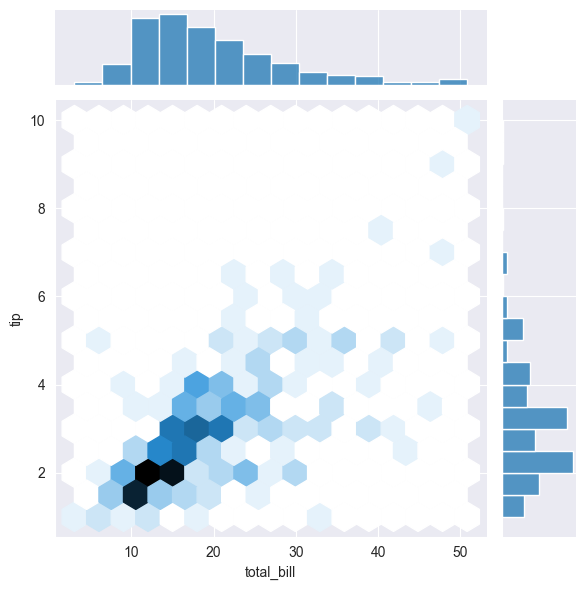

In [9]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

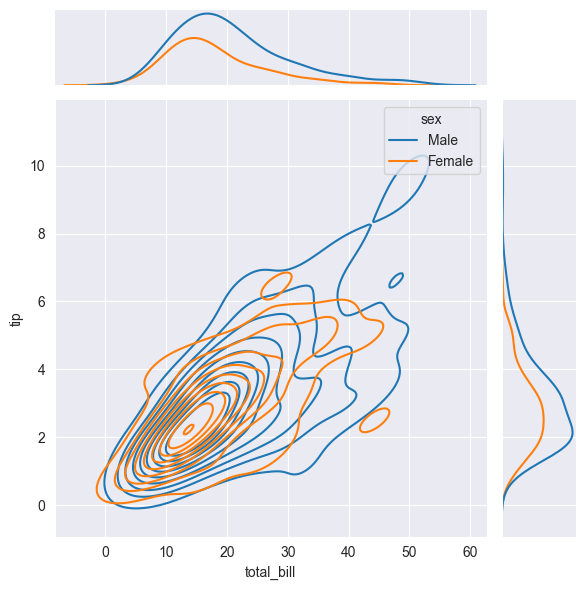

In [10]:
sns.jointplot(x='total_bill', y='tip', data=tips, hue='sex', kind='kde')

In [11]:
penguins = sns.load_dataset("penguins")

In [12]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


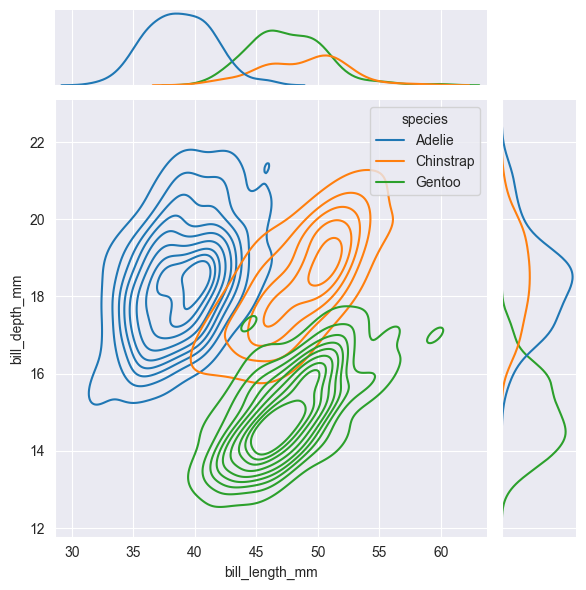

In [13]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

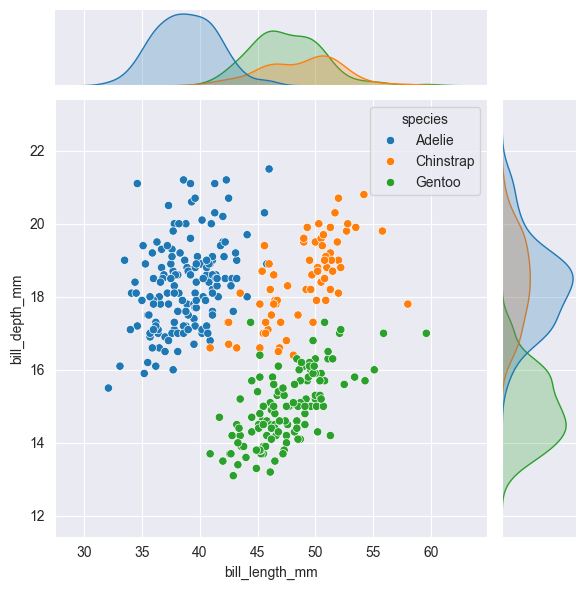

In [14]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

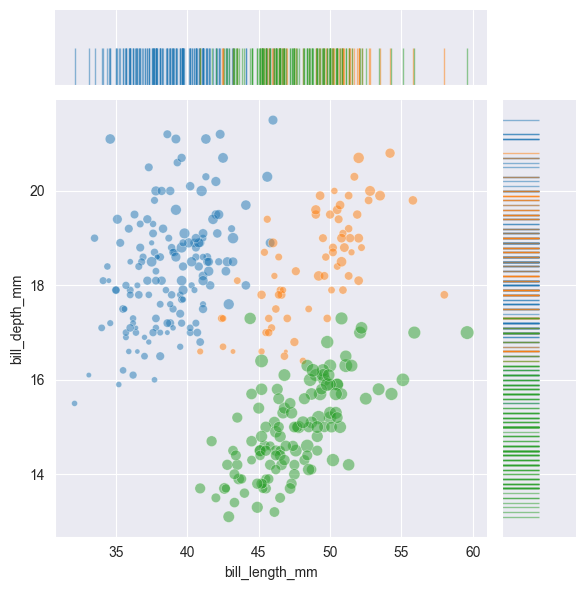

In [15]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
g.plot_joint(sns.scatterplot, size=penguins["body_mass_g"], sizes=(10, 100), alpha=0.5, legend=False)
g.plot_marginals(sns.rugplot, height=0.5, alpha=0.5)

## pairplot(https://seaborn.pydata.org/generated/seaborn.pairplot.html)

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


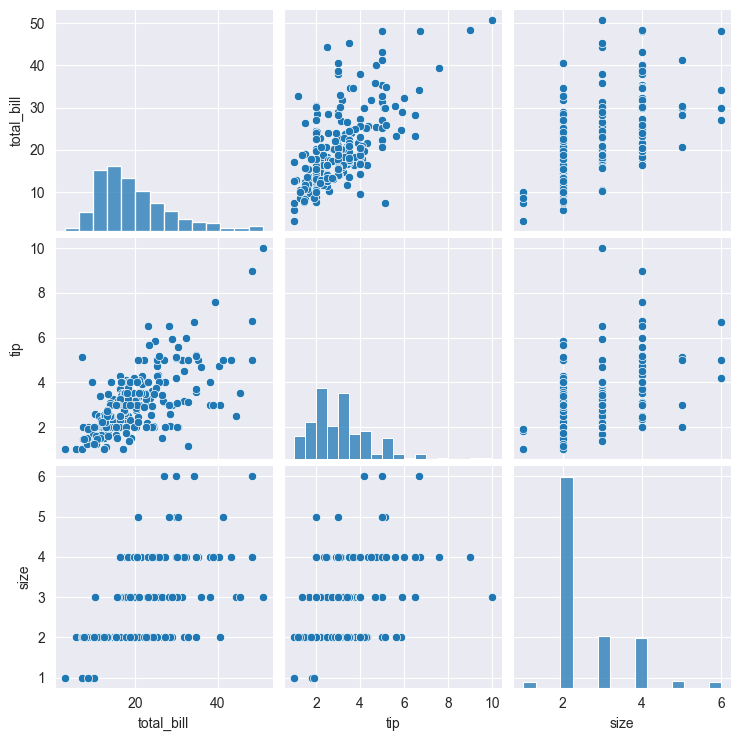

In [17]:
sns.pairplot(tips)

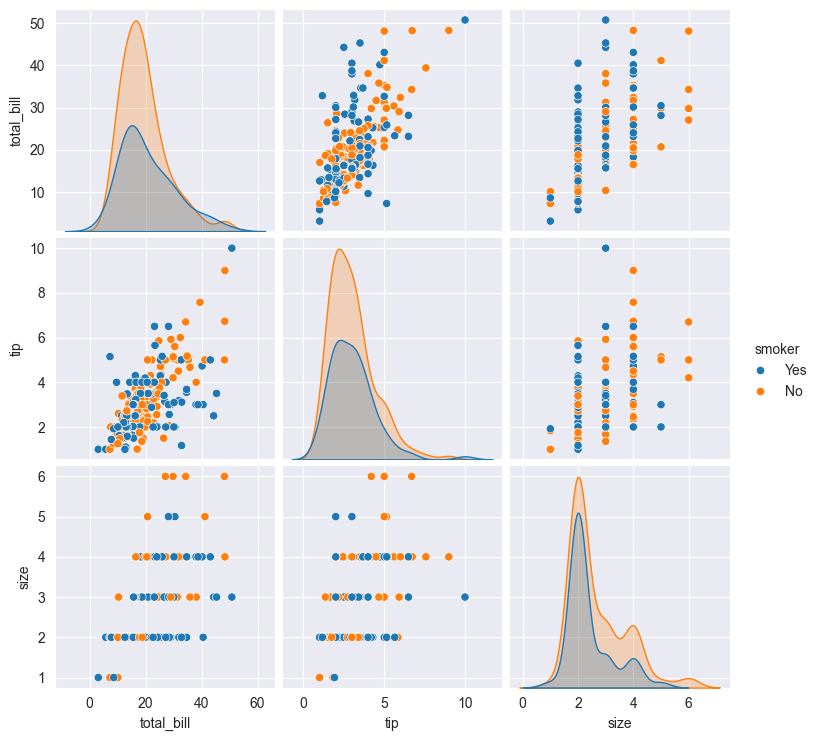

In [18]:
sns.pairplot(tips, hue="smoker")

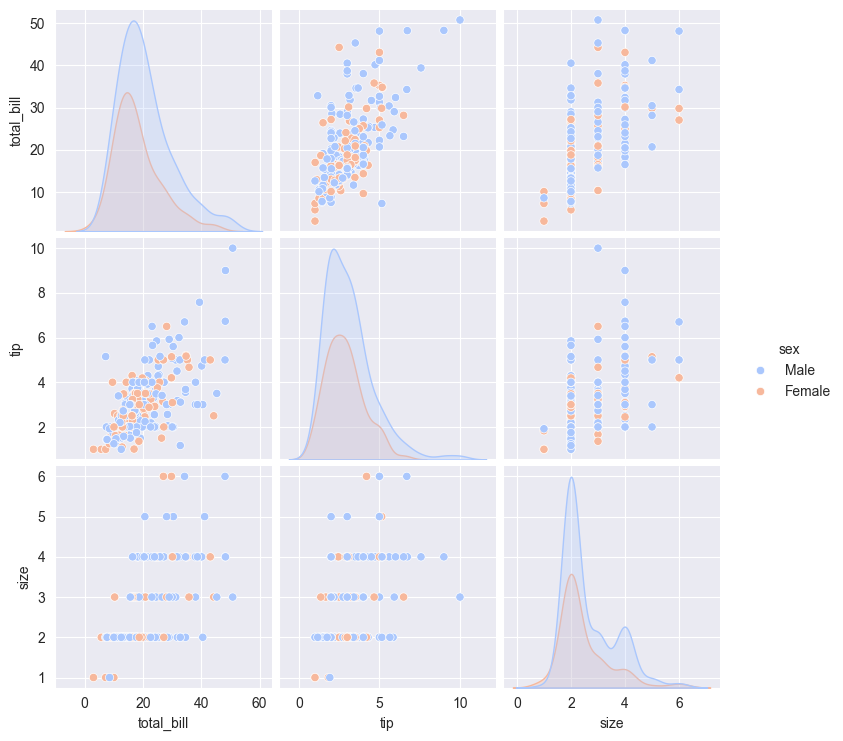

In [19]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

In [20]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


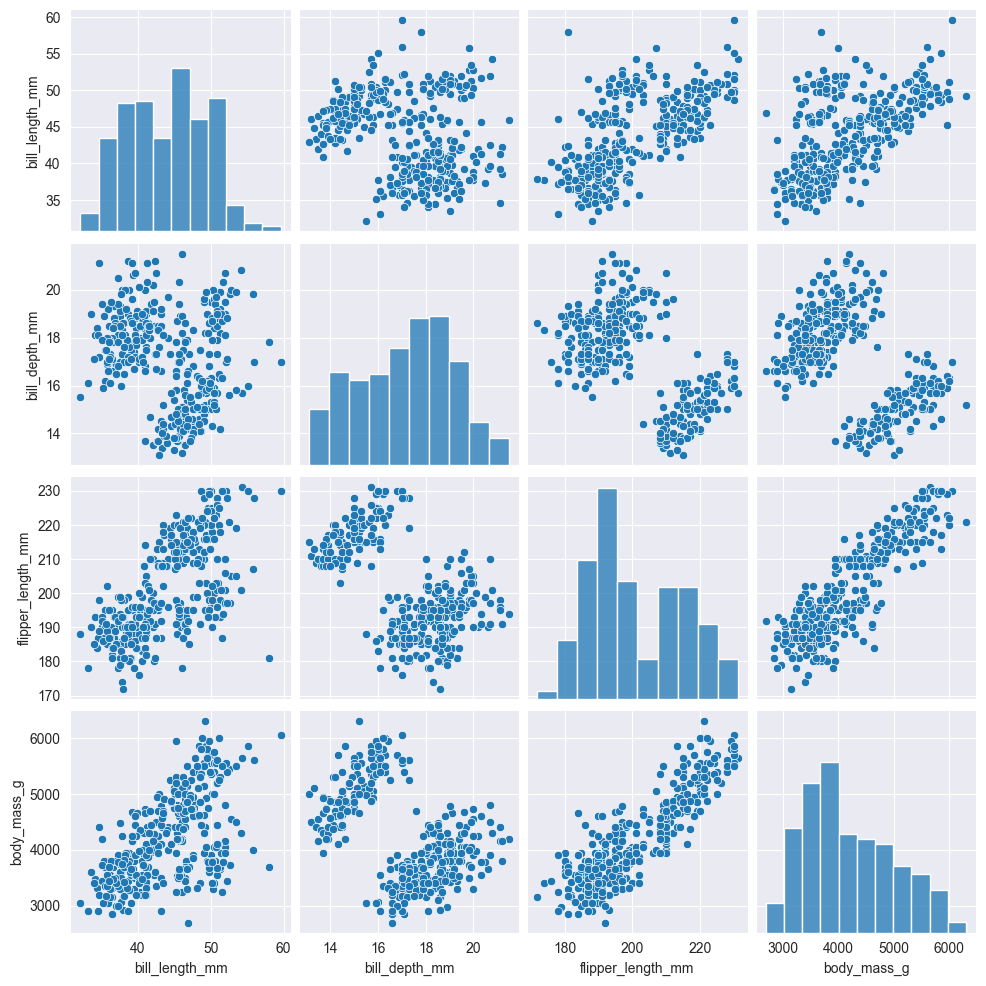

In [21]:
sns.pairplot(penguins)

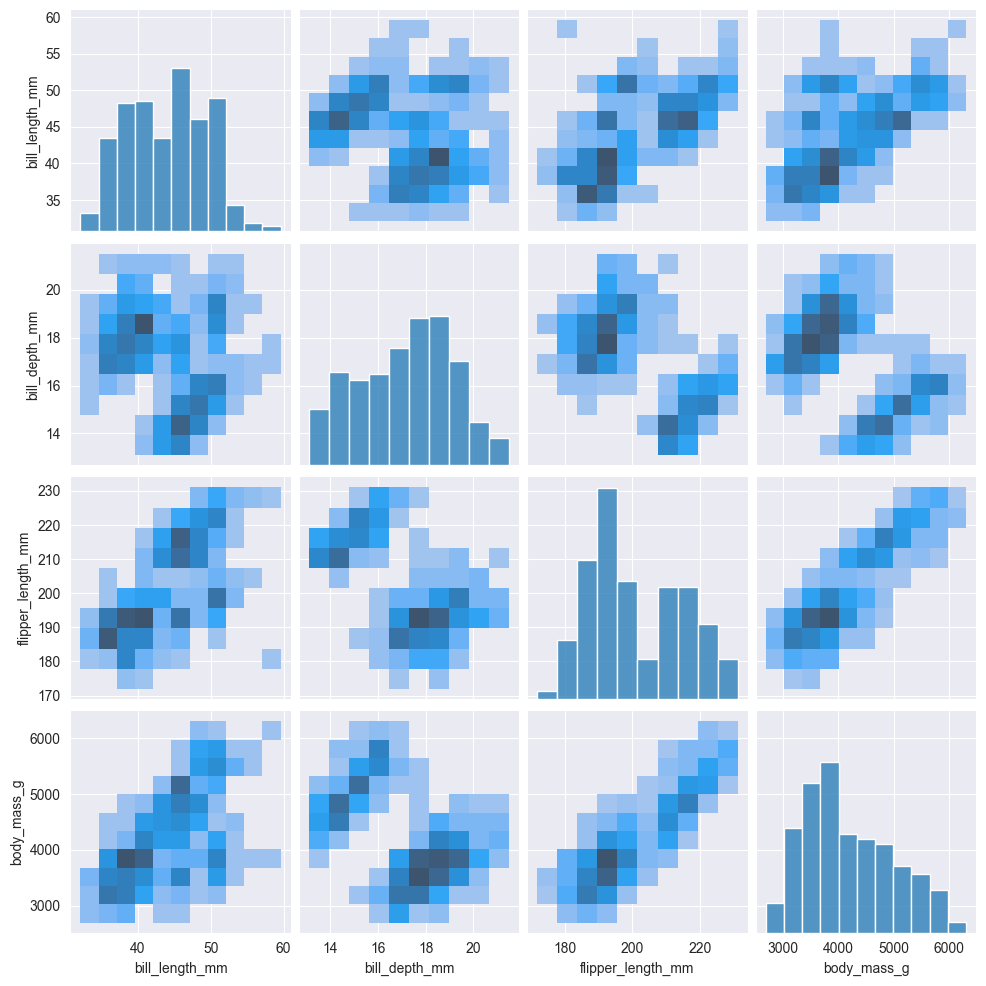

In [22]:
sns.pairplot(penguins, kind="hist")

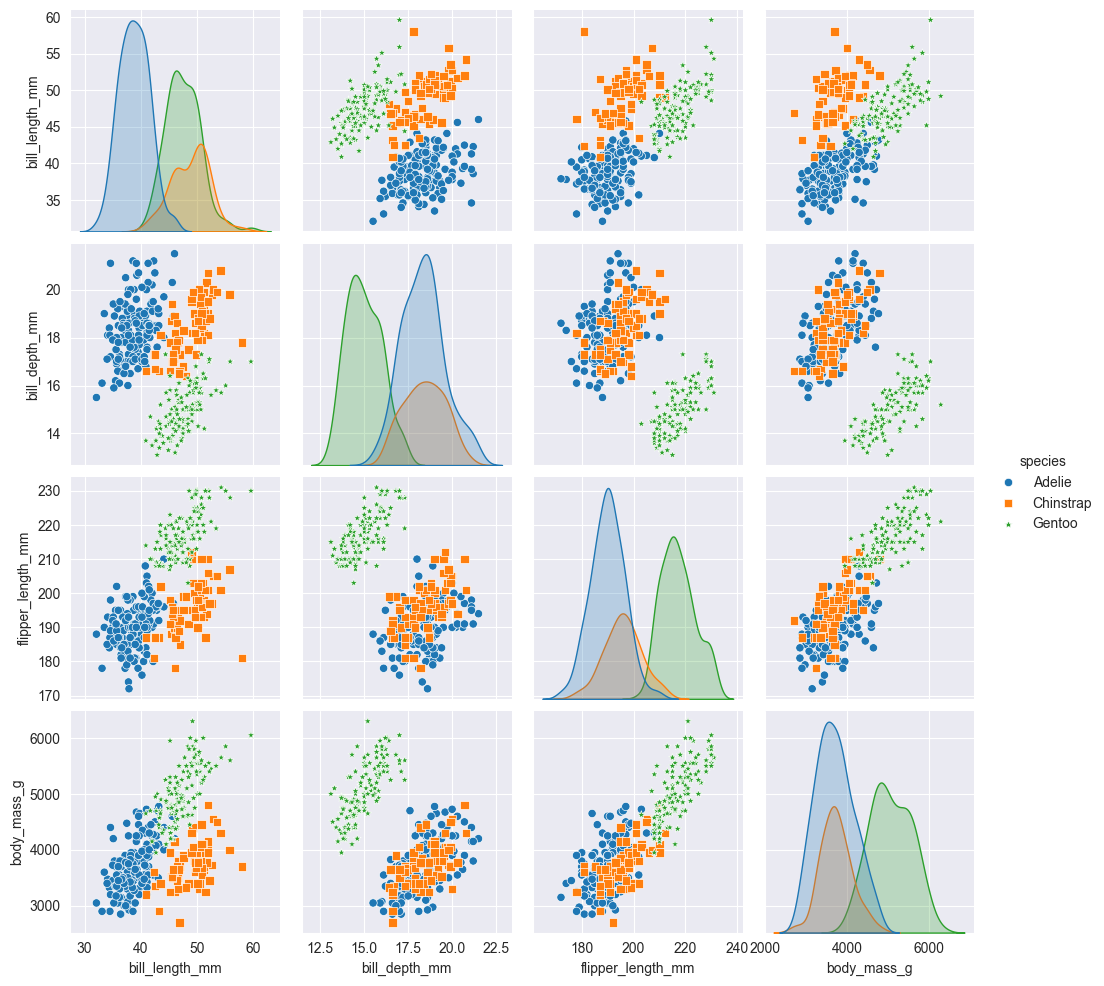

In [23]:
sns.pairplot(penguins, hue="species", markers=["o", "s", "*"])

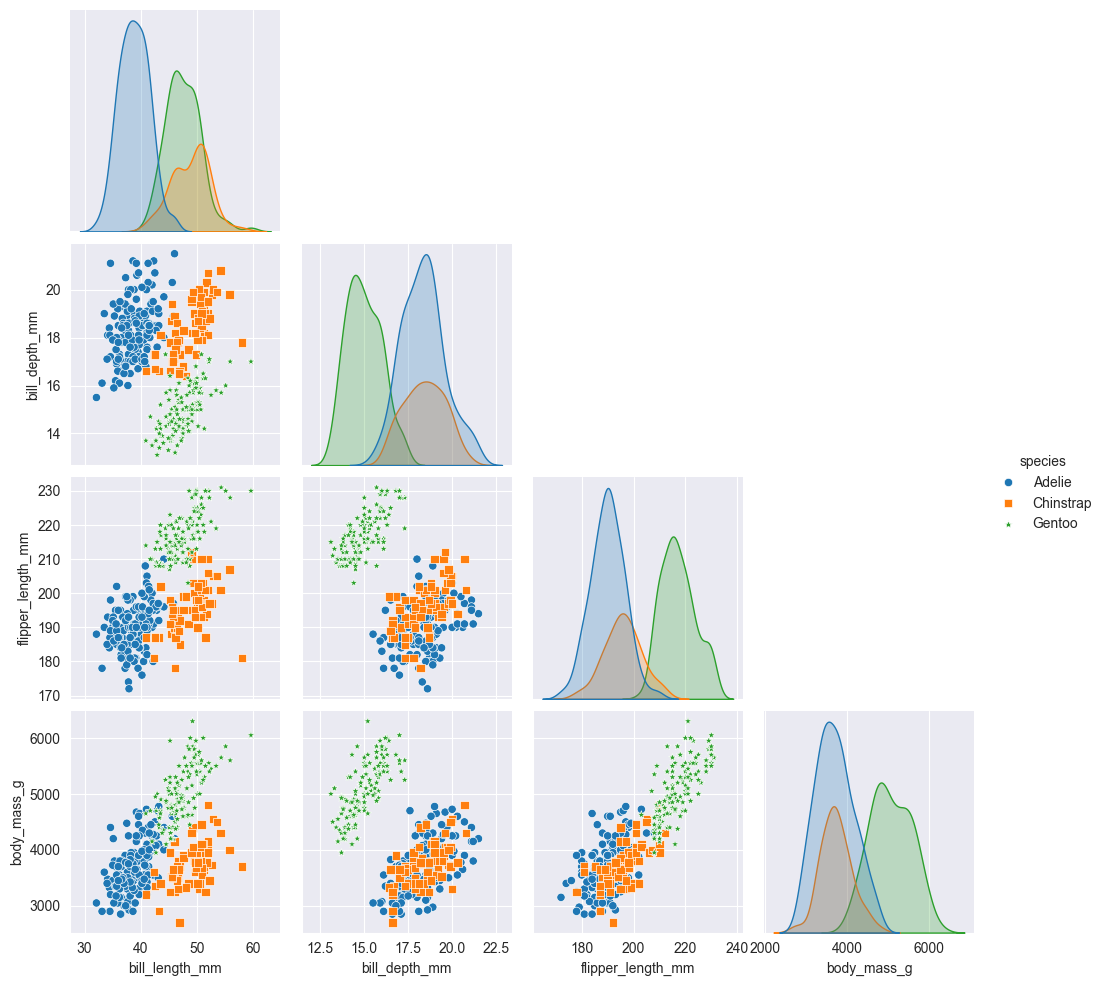

In [24]:
sns.pairplot(penguins, hue="species", markers=["o", "s", "*"], corner=True)

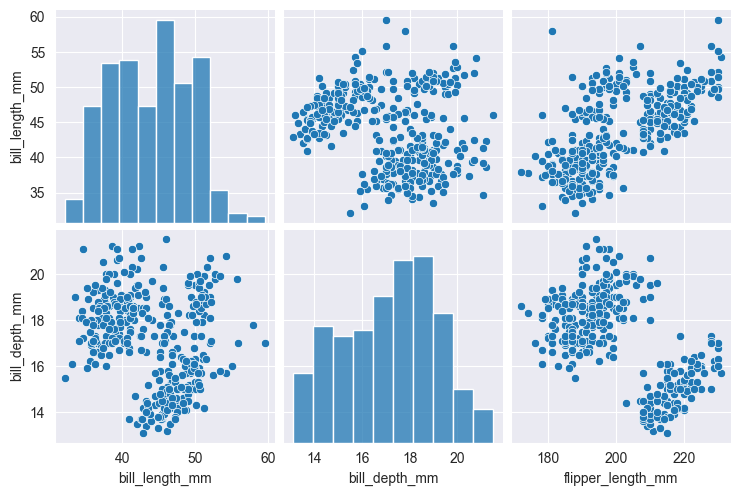

In [25]:
sns.pairplot(
    penguins,
    x_vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
    y_vars=["bill_length_mm", "bill_depth_mm"],
)

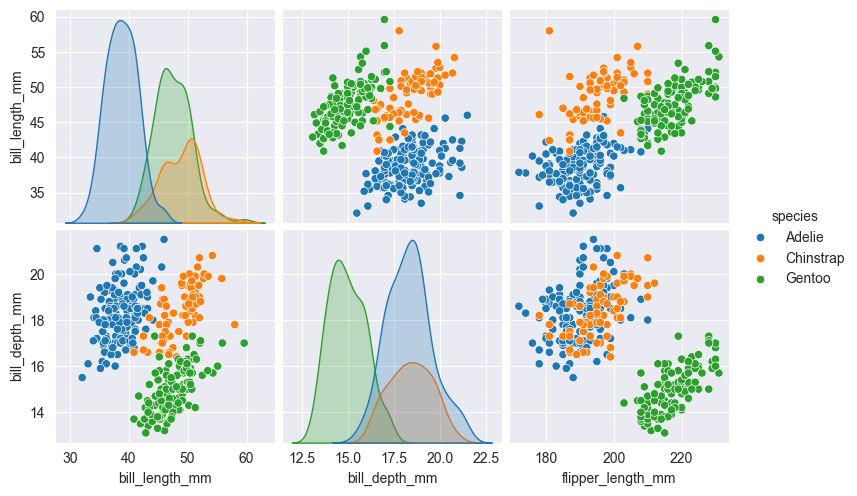

In [26]:
sns.pairplot(
    penguins,
    x_vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
    y_vars=["bill_length_mm", "bill_depth_mm"],
    hue="species"
)

## rugplot(https://seaborn.pydata.org/generated/seaborn.rugplot.html)

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<Axes: xlabel='total_bill', ylabel='Count'>

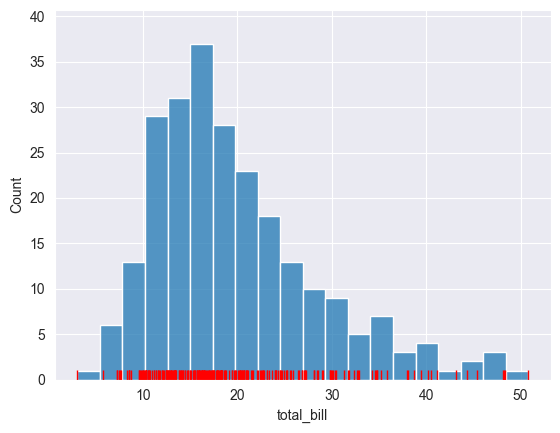

In [27]:
sns.histplot(tips['total_bill'], bins=20)
sns.rugplot(tips['total_bill'], color="r")

In [28]:
# Use JointGrid to put kde and rug together

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

<Axes: xlabel='total_bill', ylabel='Density'>

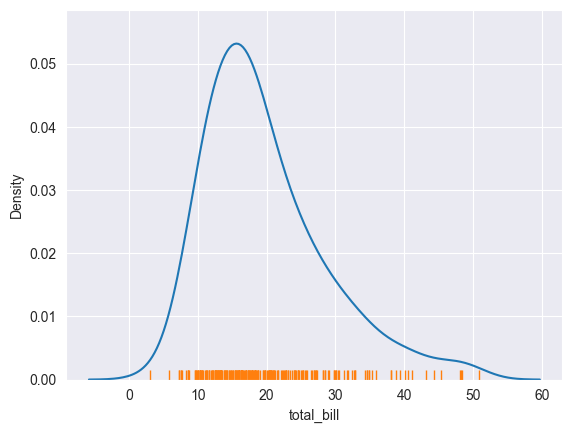

In [29]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

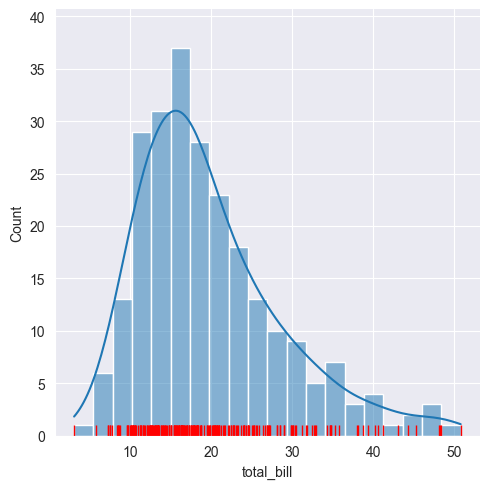

In [30]:
sns.displot(tips['total_bill'], kind="hist", kde=True, bins=20)
sns.rugplot(tips['total_bill'], color="r")

# Great Job!